# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
## <a>RAMP on AirBnB pricing</a>: price recommendation

<i>Léa Bresson, Flavien Gilles, Arthur Imbert, Eya Kalboussi, Benoît-Marie Robaglia (M2 Data Science)</i>

## Introduction

Airbnb is an american company that allows people to list and book listings around the world. The company does not own any accommodation, it is an online marketplace for hosts to lean or rent their lodging. In so doing, Airbnb is a broker that receives a certain amount of money, considered as service fees, for each booking from both the host and the guest. In recent years, Airbnb has become a great alternative to hotels due to their convenience and their low prices, making listings grow and reach up to 3.000.000 listings scattered over 65.000 cities, in January 2018.

Seeing how the Airbnb market is growing, fixing the right price for each accomodation has become crucial in order to live up to the expected price for both the host and the guest. The price advisory would benefit both parties alike, as guests will not feel like they are paying too much and hosts will not feel like they are setting too low prices for their lodgings. The right price would be interpreted as a price that both the host and the guest are willing to pay for a certain accommodation. We do not have any indicator of what “right price” means for each listing, therefore we will set up the value of a property by calculating the average market price of an accommodation with such properties and characteristics.

Since Airbnb receives service fees for each booking, advising a “reasonable price” will increase the service fee of lodging for which the price set is too low, and  will decrease the number of non rented lodging for which the price is too much larger than the market price, increasing the number of bookings and thus the number of service fees.

### The challenge: 

AirBnB pricing is a ramp challenge that aims at predict the pricing of a listing on the AirBnB platform from various informations. 

As Airbnb users are private individuals who are likely not aware of the real estate market, they (owners and lessee) can hardly decide if a price for a property is fair ; a too high price can be deterrent for the guests as a too low one will lose profit to both host and Airbnb. 

The goal is to develop prediction models able to **provide the "best price"** for the owner taking into account the market environment and his house’s criterions to maximize both his benefits and the probability for his house to be rented. He is free to follow the recommendation or ignore it. Knowing how such an accomodation is usually priced on the platform can help future hosts at the time of choosing the fare of their listing (actually, hosts usually do the work of looking at similar offer to determine the price for their offer). The goal while helping them in this process is also to avoid too expensive or too cheap listings that would result in a poor experience of the platform and lower revenue both for the host and the platform. If a host decides to ignore the recommendation and sets lower price (to rent his house faster for instance), airbnb can inform the potential guests that the house is cheaper that the market price. 


The data we will manipulate is from https://data.opendatasoft.com. The dataset gathers the listing of AirBnB in Paris area. It is divided in training and testing sets. The input contains of short texts describing the property (name, description, neighborhood_overview, neighbourhood, transit), plus some metadata. The output is the price.

 

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.19.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   
* seaborn>=0.7.1
* nltk

Further, an nltk dataset needs to be downloaded:

```
python -m nltk.downloader popular
```

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns; sns.set()

## Exploratory data analysis

Below we perform a quick analysis of the different features we have.

#### Fetch the data and load it in pandas

In [2]:
local_filename = 'data/train.csv'
# Load the file into a pandas DataFrame
data = pd.read_csv(local_filename)

In [3]:
data.head()

,name,description,neighborhood_overview,transit,host_total_listings_count,neighbourhood,zipcode,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights
0,Appartement clair prés de Montmartre,Mon logement de 28m² est à 5 mn à pied de la b...,NaN,NaN,1.0,La Chapelle,75018,48.887029,2.350311,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Heating,Essential...",36,2
1,Secured flat 5min from Eiffel Tower,• Very secured building (3 doors / code + elec...,"Quiet but full of all kinds of restaurants, s...",Subway : line 6 Dupleix (5min) line 10 Charle...,1.0,Commerce - Dupleix,75015,48.847692,2.289301,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Wheelchair a...",60,4
2,Nice studio near Sacré Coeur.,"Joli studio neuf aux poutres apparentes, accue...",NaN,NaN,2.0,Montmartre,75018,48.884517,2.335243,Entire home/apt,3,1.0,0.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,Heating,...",49,3
3,Atypical apartment - Heart of Paris (Belleville),Mon appartement est proche de beaucoup de rest...,NaN,NaN,1.0,Buttes-Chaumont - Belleville,75020,48.872612,2.381921,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,Break...",80,6
4,Skylight Studio in Latin Quarter,"Light-filled, quiet, elegant Zen designer stud...",This Parisian neighborhood is known for the So...,Metro - line 7 : Place Monge and Censier-Daube...,2.0,Panthéon,75005,48.840237,2.348156,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Elevator in buil...",52,30


In [4]:
data.dtypes

name                          object
description                   object
neighborhood_overview         object
transit                       object
host_total_listings_count    float64
neighbourhood                 object
zipcode                       object
latitude                     float64
longitude                    float64
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
amenities                     object
price                          int64
minimum_nights                 int64
dtype: object

In [5]:
data.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights
count,30727.000000,30732.000000,30732.000000,30732.000000,30630.000000,30672.000000,30701.000000,30732.000000,30732.000000
mean,5.253035,48.863852,2.344913,3.042659,1.087790,1.037820,1.673431,95.517669,3.431244
std,21.854994,0.018296,0.033346,1.444775,0.353244,0.792768,0.995655,80.451074,10.433523
min,0.000000,48.811993,2.227926,1.000000,0.000000,0.000000,1.000000,8.000000,1.000000
25%,1.000000,48.850612,2.324002,2.000000,1.000000,1.000000,1.000000,55.000000,2.000000
50%,1.000000,48.864561,2.348108,2.000000,1.000000,1.000000,1.000000,75.000000,2.000000
75%,2.000000,48.878857,2.369820,4.000000,1.000000,1.000000,2.000000,109.000000,3.000000
max,661.000000,48.904987,2.467046,16.000000,8.000000,7.000000,16.000000,2680.000000,1000.000000


In [6]:
data.shape

(30732, 18)

In [7]:
data.count()

name                         30731
description                  30730
neighborhood_overview        18525
transit                      19777
host_total_listings_count    30727
neighbourhood                30355
zipcode                      30705
latitude                     30732
longitude                    30732
room_type                    30732
accommodates                 30732
bathrooms                    30630
bedrooms                     30672
beds                         30701
bed_type                     30732
amenities                    30732
price                        30732
minimum_nights               30732
dtype: int64

In the starting kit, we give you a subset of 30732 instances for training and 15136 instances for testing.

Data contains missing values - especially the variables "neighborhood_overview" and "transit". You may need to perform data processing such as data imputation.

In [8]:
data.transit.isnull().sum()

10955

Some data, such as zipcode, need to be cleaned:

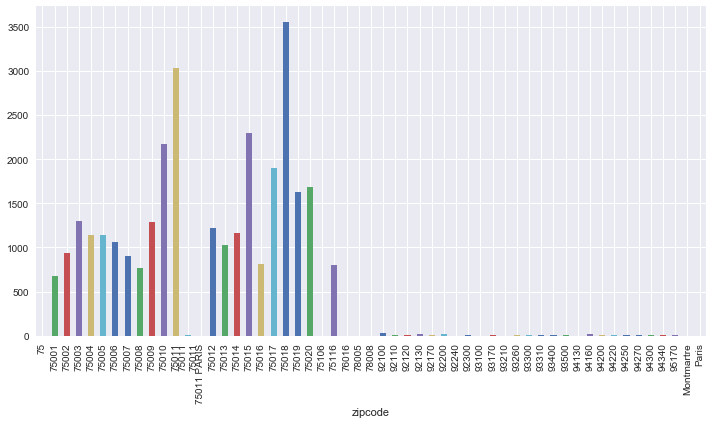

In [9]:
plt.figure(figsize=(10, 6))
data.groupby(by='zipcode').size().plot(kind='bar')
plt.tight_layout()

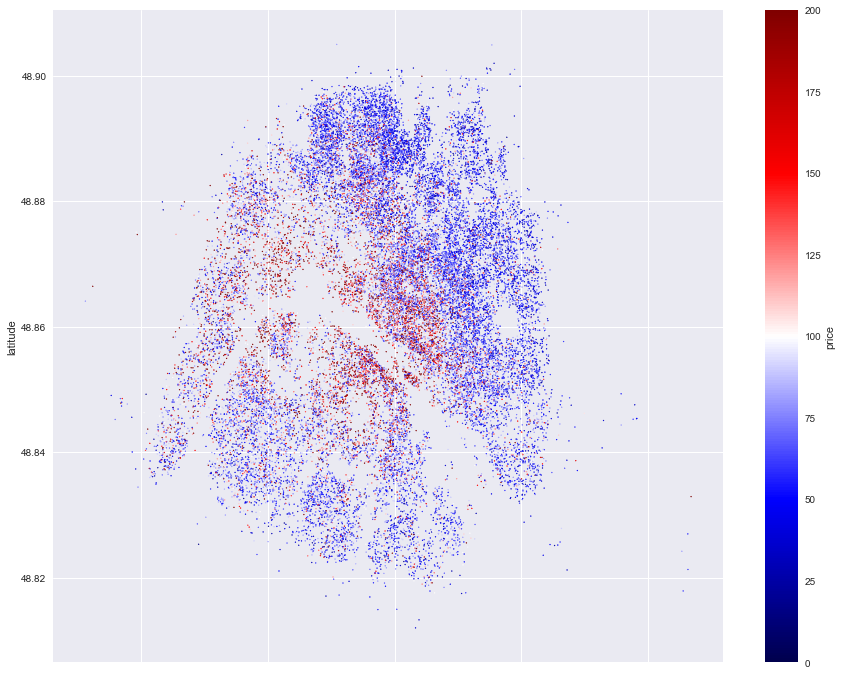

In [10]:
data.plot.scatter(x='longitude', y='latitude', c='price', s=1, figsize=(15, 12), colormap='seismic', vmin=0, vmax=200)

We can faintly distinguish the Seine River contour but we can notice higher prices in the center of the French capital and in the west side.

In [11]:
data['room_type'].value_counts()

Entire home/apt    26937
Private room        3585
Shared room          210
Name: room_type, dtype: int64

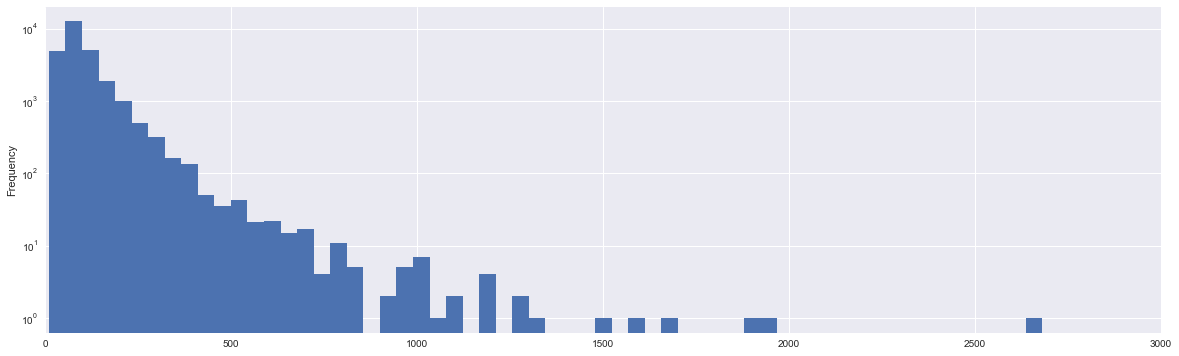

In [12]:
data.loc[data['room_type']=='Entire home/apt', 'price'].plot.hist(bins=60, logy=True, figsize=(20, 6), xlim=(0, 3000))

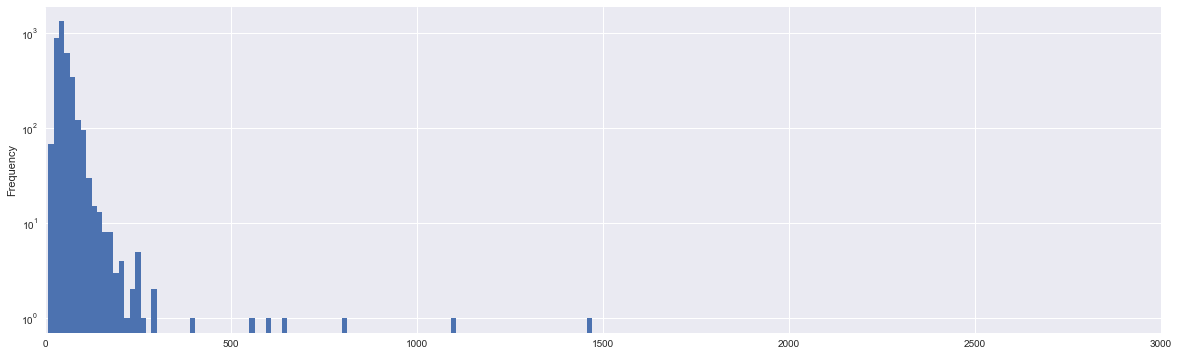

In [13]:
data.loc[data['room_type']=='Private room', 'price'].plot.hist(bins=100, logy=True, figsize=(20, 6), xlim=(0, 3000))

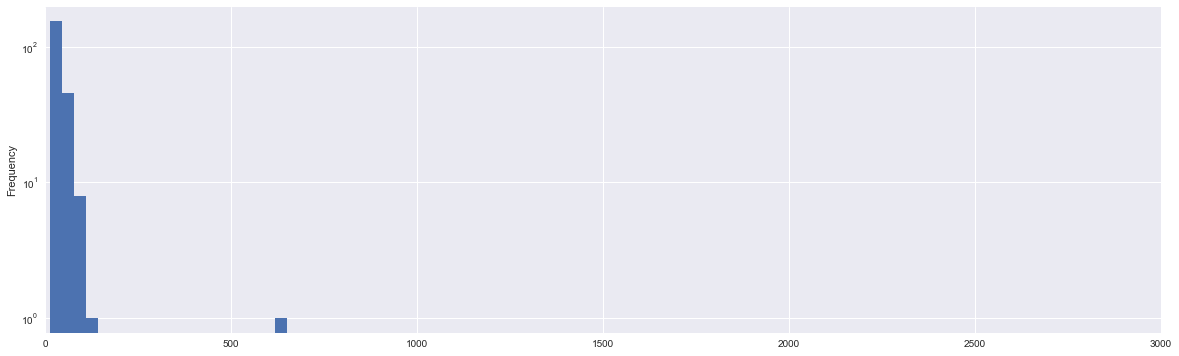

In [14]:
data.loc[data['room_type']=='Shared room', 'price'].plot.hist(bins=20, logy=True, figsize=(20, 6), xlim=(0, 3000))

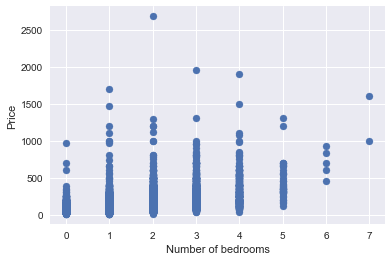

In [15]:
plt.scatter(x=data['bedrooms'], y=data.price)
plt.ylabel('Price')
plt.xlabel('Number of bedrooms')
plt.show()

### Predicting the "best" price

The goal is to predict the best price of a location.

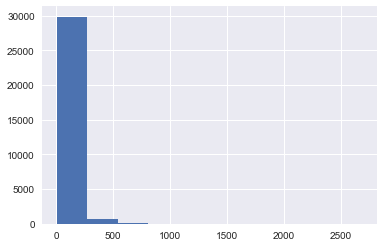

In [16]:
plt.hist(data.price)
plt.show()

Given the asymetric distribution of the price, we use a log-transformation:

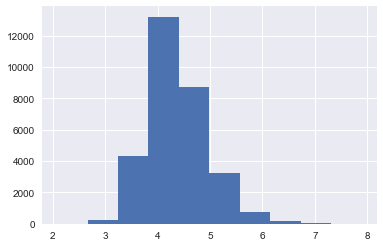

In [17]:
target = np.log(data.price)
plt.hist(target)
plt.show()

## Building predictive models

### Choice of the loss function

At first, we thought of using the RMSLE (Root Mean Squared Loss Error), which is a common way to measure the performance of a continuous label prediction. Theoretically, this measure captures the precision of the prediction and thus represents a discriminative criterion for the choice of the algorithm.
$$ RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(p_i +1) - log(a_i +1) )^2}$$ 

Where $n$ is the total number of observations, $p_i$ is the prediction of price (logarithmic scale) and $a_i$ is the actual sale price for i (logarithmic scales).


However, due to its symmetric property, such a loss function will penalize too high prices the same way as too low prices, which does not make any sense from a commercial point of view.

Indeed, when the price predicted is higher than the real one, the guest is less likely to rent. We can suppose that a guest is willing to pay up to 10% more than the appropriate price for a certain lodging but will drop his reservation if the price is higher than that. Airbnb is then losing the entire service fee of the corresponding booking. 
Inversely, when the price predicted is lower than the real one, the guest do rent the lodging, but Airbnb will be receiving a lower service fee. 

The cost of the prediction error should then be a weighted sum depending on the value of the fee (which is approximately 10% of the value of the lodging). Furthermore, it has to take into account whether the difference between the predicted value and the real one is positive or negative. 



**We define the business loss as:**
* If $p_i > 1.1 * a_i \Rightarrow loss = fee * a_i $
* If  $a_i \le p_i \le 1.1 * a_i \Rightarrow loss = fee * (p_i - a_i) $
* If  $ p_i < a_i \Rightarrow loss = fee * (a_i - p_i) $

Where $p_i$ is the prediction of price (logarithmic scales) and $a_i$ is the actual sale price (logarithmic scales) for i.

The goal of the project is to find a price predictor that minimizes this customized loss function.


*Note: the model has to be retrained each time the real estate market changes (maybe once a year ?). Given our asymetric loss function, the risk is that our system generates a decrease in the Airbnb renting prices. In order to avoid such an effect, we should use an external index (such as inflation or the house price index) to correct the downward bias before retraining our model.*


## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files:   
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features). 
* a class `Regressor` to predict 

### Feature extractor

The feature extractor implements a `transform` member function. It is saved in the file [`submissions/starting_kit/feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py). It receives the pandas dataframe `X_df` defined at the beginning of the notebook. It should produce a numpy array representing the extracted features, which will then be used for the regression.  

Note that the following code cells are *not* executed in the notebook. The notebook saves their contents in the file specified in the first line of the cell, so you can edit your submission before running the local test below and submitting it at the RAMP site.

In [18]:
%%file submissions/starting_kit/feature_extractor.py

class FeatureExtractor():
    
    def __init__(self):
        pass

    def fit(self, X_df, y=None):
        return self

    def fit_transform(self, X_df, y=None):
        self.fit(X_df)
        return self.transform(self.X_df)

    def transform(self, X_df):
        return X_df[['latitude', 'longitude']].values

Overwriting submissions/starting_kit/feature_extractor.py


### Regressor

The classifier follows a classical scikit-learn classifier template. It should be saved in the file [`submissions/starting_kit/classifier.py`](/edit/submissions/starting_kit/classifier.py). In its simplest form it takes a scikit-learn pipeline, assigns it to `self.clf` in `__init__`, then calls its `fit` and `predict_proba` functions in the corresponding member funtions.

In [19]:
%%file submissions/starting_kit/regressor.py
from sklearn.linear_model import LogisticRegression
import numpy as np

class Regressor():
    def __init__(self):
        self.reg = LogisticRegression(random_state=61)

    def fit(self, X, y):
        self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)

Overwriting submissions/starting_kit/regressor.py


## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python file `regressor.py` is in the  [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](http://localhost:8890/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

Note: the training data are available [here](https://drive.google.com/file/d/18wQTvop7IQ05SJomhsd4PY1iNn5betAa/view?usp=sharing). 

In [20]:
!ramp_test_submission --quick-test

Testing AirBnB pricing regression
Reading train and test files from ./data ...
Reading cv ...
Training .\submissions\starting_kit ...
CV fold 0
	score  rmsle  lossBusiness    rmse  rel_rmse
	train   0.47         328.0   46.95      0.46
	valid   0.34          66.6   26.00      0.39
	test    0.58         551.0  103.08      0.49
CV fold 1
	score  rmsle  lossBusiness    rmse  rel_rmse
	train   0.50         350.2   42.87      0.63
	valid   0.61          89.9   58.44      0.74
	test    0.67         600.6  106.35      0.73
CV fold 2
	score  rmsle  lossBusiness    rmse  rel_rmse
	train   0.42         292.0   38.06      0.46
	valid   0.54         102.6   60.83      0.41
	test    0.58         551.0  103.08      0.49
CV fold 3
	score  rmsle  lossBusiness    rmse  rel_rmse
	train   0.55         313.8   51.29      0.40
	valid   0.49          66.6   44.33      0.37
	test    0.68         558.3  108.35      0.44
CV fold 4
	score  rmsle  lossBusiness    rmse  rel_rmse
	train   0.55         334.8   46.4

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Contact

Don't hesitate to [contact us](mailto:airbnb@gmail.com?subject=Airbnb pricing notebook).